<a href="https://colab.research.google.com/github/Natasha617/-advanced-machine-learning/blob/main/Clustering_Digits_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризация методом `K-means` для выделения групп объектов

В этой задаче будет рассмотрен метод кластеризации <code>K-means</code> для решения непосредственно задачи кластеризации — задачи выделения схожих структур в данных. Работать будем с известным набором данных <a href="http://yann.lecun.com/exdb/mnist/"><code>MNIST</code></a>.

Загрузим набор данных. Будем использовать только тестовую часть оригинального набора, чтобы сократить время обучения моделей.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [3]:
from keras.datasets import mnist
import warnings
#warnings.filterwarnings("ignore")

(_,_), (X, y) = mnist.load_data()

Пример вывода нескольких объектов и соответствующих меток классов:

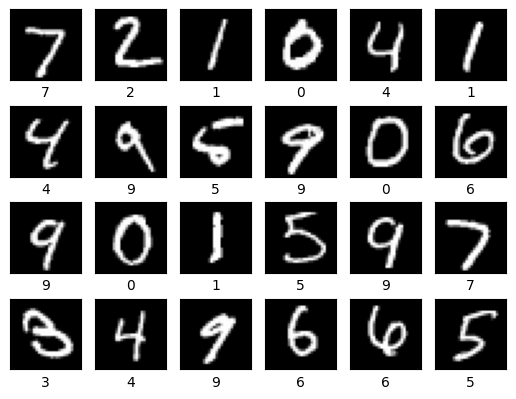

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

Введите <code>.shape</code> полученного набора данных

In [9]:
np.shape(X)

(10000, 28, 28)

In [5]:
X = X.reshape(10000, -1)

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=11)

In [13]:
from sklearn.cluster import KMeans

Давайте, раз речь идет об известном наборе данных, заставим <code>K-means</code> искать $10$ групп объектов.

«Распрямите» изображения и обучите алгоритм <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>KMeans</code></a> с параметрами, указанными в вашем задании.

In [7]:
np.shape(x_train)

(8000, 784)

In [8]:
model_KM = KMeans(random_state=11, n_clusters=10)
model_KM.fit(x_train)
labels = model_KM.predict(x_train)

Определите чило элементов, отнесенных к кластеру, указанному в вашем задании

In [12]:
X_res = pd.DataFrame(x_train)
X_res['label'] = labels
X_res['label'].value_counts()

9    1070
8    1009
0     914
3     866
5     767
2     706
7     701
4     694
1     652
6     621
Name: label, dtype: int64

Постройте изображения, соответствующие центроидам полученных кластеров. Для этого `reshape`ните координаты центроидов до размера $28 \times 28$ и постройте полученную матрицу, например, в черно-белых оттенках.



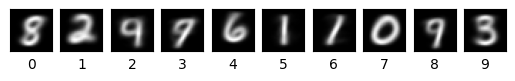

In [14]:
centr = X_res.groupby('label').mean()


fig, ax = plt.subplots(1, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(centr.iloc[i].to_numpy().reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(centr.iloc[i].name, color='black')

Можно заметить, что получившиеся картинки весьма походят на рукописные цифры. Впрочем, кластеризация прошла не без накладок. Предположите, какие цифры могут быть перепутаны и каких не хватает.

Так как получившиеся кластеры ничего не знают о природе кластеризумых объектов, метки кластеров могут отличаться от «разумных меток». Восстановите правильные метки, используя следующие соображения: кластеру присваивается метка тех цифр, представителей которых в кластере большинство. Действительно ли это помогло восстановить справедливость?

Введите полученные метки кластеров после преобразования и сравните с ранее построенными изображениями на основе центроидов. Подтверждаются ли ваши догадки фактами?

In [15]:
X_res['real_label'] = y_train

link = X_res.groupby(['label'])['real_label'].agg(pd.Series.mode)

link

label
0    8
1    2
2    4
3    7
4    6
5    1
6    1
7    0
8    7
9    3
Name: real_label, dtype: uint8

Разумно оценить что-то вроде точности. Считая, что все объекты кластера имеют ту же метку, что и сам кластер, сравните эти метки с истинными метками. Вычислите <code>accuracy</code>. Рекомендуем использовать функцию <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>accuracy_score</code></a> из библиотеки <code>sklearn</code>.

In [17]:
from sklearn.metrics import accuracy_score

link_dict = {}
for i, j in enumerate(link):
    link_dict[i] = j

smart_labels = np.vectorize(link_dict.get)(labels)

round(accuracy_score(smart_labels, y_train),3)

0.59

При помощи метода <code>.predict()</code> произведите кластеризацию тестовых данных. Переименуйте метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования.

In [21]:
y_pred = model_KM.predict(x_test)

round(accuracy_score(np.vectorize(link_dict.get)(y_pred), y_test),3)

0.61

Постройте матрицу ошибок.

In [22]:
test_compare = pd.DataFrame(np.vectorize(link_dict.get)(y_pred), columns=['pred'])
test_compare['real'] = y_test
test_compare.groupby('real').agg(pd.Series.mode)

,pred
real,
0,0
1,1
2,2
3,3
4,7
5,8
6,6
7,7
8,8


А сколько кластеров кажется оптимальным количеством, если использовать каменистую осыпь? Постройте график каменистой осыпи для числа кластеров от $7$ до $16$. Можно ли уверенно определить оптимальное число кластеров?

In [ ]:
# < ENTER YOUR CODE HERE >

Все эти обучения черезчур уж долгие. Давайте сделаем «ход конем» и понизим размерность данных, пытаясь сохранять расстояния между объектами. Посмотрим, как это скажется на скорости и точности.

Преобразуйте <b>тренировочный набор</b> данных при помощи метода <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"><code>TSNE</code></a> из библиотеки <code>sklearn</code>.

In [23]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, init='random', random_state=11).fit_transform(x_train)

In [25]:
x_test_emb = TSNE(n_components=2, init='random', random_state=11).fit_transform(x_test)

Произведите кластеризацию полученного набора данных при помощи <code>KMeans</code> с параметрами, указанными в вашем задании. Аналогично проделанному раньше переназначьте метки кластеров на основе метки большинства объектов в рамках кластера. Оцените точность модели на <b>тренировочных данных</b>.

In [30]:
kmeans = KMeans(n_clusters=10, random_state=11)

kmeans.fit(X_embedded)
labels = kmeans.predict(X_embedded)

X_res_emb = pd.DataFrame(X_embedded)
X_res_emb['label'] = labels
X_res_emb['real_label'] = y_train

link = X_res_emb.groupby(['label'])['real_label'].agg(pd.Series.mode)
link_dict = {}
for i, j in enumerate(link):
    link_dict[i] = j

smart_labels = np.vectorize(link_dict.get)(labels)
accuracy_score(smart_labels, y_train)

0.8155

In [26]:
accuracy_score(y_test, cls.predict(x_test))

ValueError: ignored

Проблема, однако, известна. `t-SNE` — метод, который не дает правила получения проекций многомерного пространства на, например, двумерное. Тем самым, при появлении новых данных, проекции придется искать заново.

В то же время, еще раз хочется подчеркнуть, как обучение без учителя позволило построить классификатор, который, как будто бы, является результатом решения задачи обучения с учителем.